#Multi Classification Neural Network of Hyperspectral Image

##Setting Up Drive

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Data Handling

###Importing Data

In [30]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
data = loadmat('/content/drive/MyDrive/Samson/samson_1.mat')
Samson_gt = loadmat('/content/drive/MyDrive/Samson/end3.mat')

###Preparing The Data

To find the correct labels we need to use these commands

In [31]:
print(data.keys())
print(Samson_gt.keys())
print(image.shape)


dict_keys(['__header__', '__version__', '__globals__', 'nRow', 'nCol', 'nBand', 'V'])
dict_keys(['__header__', '__version__', '__globals__', 'cood', 'A', 'M'])
(156, 9025)


In [43]:
import numpy as np

#Making the arrays
image = data['V']# Original shape: (num_bands, num_pixels)
labels = Samson_gt['A']# Original shape: (num_classes, num_pixels)

# Transpose image to (num_pixels, num_bands)
X = image.T

# Convert one-hot encoded labels to class labels and flatten to (num_pixels,)
y = np.argmax(labels, axis=0) + 1 # Add 1 to convert 0-based index to 1-based class labels

#Remove unlabeled pixels (label == 0)
mask = y > 0
X_labeled = X[mask]
y_labeled = y[mask]


print(f"X_labeled shape: {X_labeled.shape}")#(num_pixels_with_label, Spectral bands)
print(f"y_labeled shape: {y_labeled.shape}")#(num_pixels_with_label,)

X_labeled shape: (9025, 156)
y_labeled shape: (9025,)


###Data splitting

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Feature normailzing

In [45]:
from sklearn.preprocessing import MinMaxScaler
# Scaling makes all the data be in the range from [0,1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


## Making the Neural Network

In [55]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, cohen_kappa_score

#This is where it is no longer just forward pass

model = MLPClassifier(
    hidden_layer_sizes=(100,100,55),  # 1 hidden layer with 100 neurons
    activation='relu',          # ReLU activation
    solver='adam',              # Adam optimizer
    max_iter=500,               # Epochs
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Kappa: {kappa:.4f}")

#99.28 at 75
#99.34 at 60
#99.39 at 55

Accuracy: 99.39%
Kappa: 0.9907


##Confusion Matrix

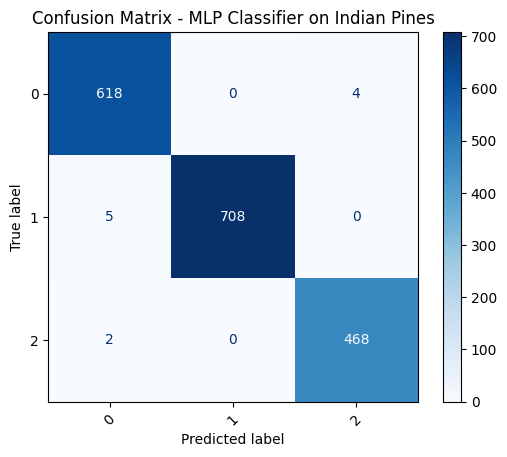

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix - MLP Classifier on Indian Pines")
plt.show()